In [0]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display
#from utils import plot_decision
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [155]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [0]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [157]:
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [0]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

In [160]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 2
Accuracy: 0.97


In [0]:
size=[]
acc=[]
for i in range(1,100):
  size.append(i/100)
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/100, random_state=4)
  y_pred = dtree.predict(X_test)
  accuracy = metrics.accuracy_score(y_test, y_pred)
  acc.append(accuracy)

<function matplotlib.pyplot.show>

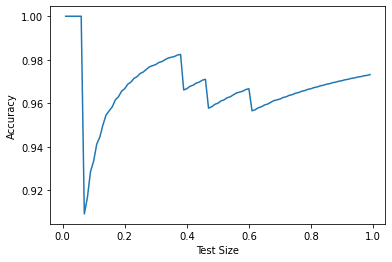

In [162]:
plt.plot(size,acc)
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.show